## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()#Menampilkan 5 data teeratas

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
df.tail()#meanmpilkan 5 data terakhir

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
df.sample(5)#menampilkan 5 data secara acak

,survived,name,sex,age
471,0,"Keane, Mr. Daniel",male,35.0
122,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0
89,0,"Davidson, Mr. Thornton",male,31.0
396,1,"Doling, Miss. Elsie",female,18.0
123,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0


In [ ]:
df.info()
#Menampilkan ringkasan informasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


**OBSERVASI**

*   Data berisi 4 kolom dan 500 baris
*   Pada kolom survived terdiri atas 2 bilangan biner yaitu 1 dan 0

*   terdapat missing value pada kolom age





In [ ]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
categoricals = ['name','sex']



numericals = ['age','survived']

In [ ]:
# Syntax numerical statistical summary
df[numericals].describe()


,age,survived
count,451.000000,500.000000
mean,35.917775,0.540000
std,14.766454,0.498897
min,0.666700,0.000000
25%,24.000000,0.000000
50%,35.000000,1.000000
75%,47.000000,1.000000
max,80.000000,1.000000


In [ ]:
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288




**OBSERVASI**

1.Kolom name mencatat 499 nilai yang berbeda, yang menunjukkan adanya satu nama yang muncul lebih dari sekali.

2.Kolom sex hanya memiliki dua nilai unik, yaitu male dan female, dengan jumlah male lebih dominan sebanyak 288 orang.

3.Berdasarkan data, lebih dari separuh penumpang berhasil diselamatkan.

4.Usia penumpang berkisar dari bayi hingga orang lanjut usia.


**PROSES PENGECEKAN DAN PEMBERSIHAN DATA DUPLIKAT**


In [ ]:
len(df)
#menghitung dan menampilkan total data

500

In [ ]:
len(df.drop_duplicates())
#menghitung dan menampilkan total data kecuali yang duplikat

499

In [ ]:
len(df.drop_duplicates())/len(df)
#Mengecek apakah ada data yang duplikat

0.998

Karena output tidak mencapai 1 maka ada data yang duplikat

In [ ]:
duplicates = df[df.duplicated(keep=False)]

In [ ]:
duplicates
#Menampilkan data yang duplikat

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [ ]:
df = df.drop_duplicates()
#Menghilangkan data yang duplikat

In [ ]:
len(df.drop_duplicates()) / len(df)
#Mengecek kembali data yang duplikat

1.0

Karena output 1 berarti tidak ada lagi data yang duplikat

**Proses Pengecekan dan Handling data yang hilang**

In [ ]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


Terdapat data yang hilang sebanyak 49 pada kolom age

In [ ]:
total_rows = len(df)
total_rows

499

In [ ]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
total_rows = len(df)

for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [ ]:
df['age'].median()

35.0

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column] = df[column].fillna(df[column].mode()[0])
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        df[column] = df[column].fillna(df[column].median())

Proses handling data yang hilang dengan mengganti dengan nilai median

In [ ]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


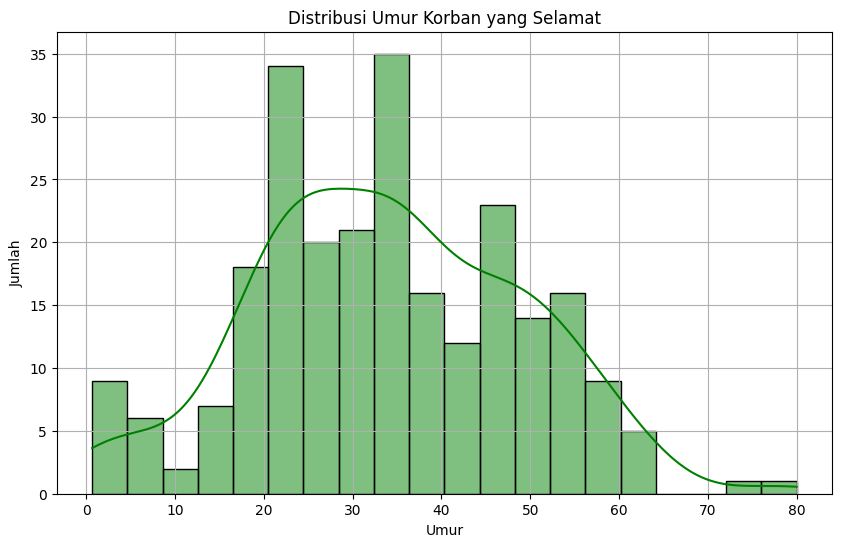

In [ ]:
# Visualisasi data korban yang selamat berdasarkan umur
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df[df['survived'] == 1], x='age', bins=20, kde=True, color='green')
plt.title('Distribusi Umur Korban yang Selamat')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

<ipython-input-16-542bad636a40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['survived'] == 1], x='sex', palette='Set2')


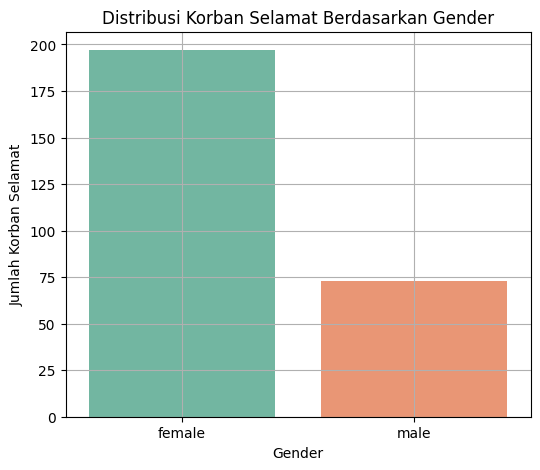

In [ ]:

plt.figure(figsize=(6,5))
sns.countplot(data=df[df['survived'] == 1], x='sex', palette='Set2')
plt.title('Distribusi Korban Selamat Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Korban Selamat')
plt.grid(True)
plt.show()